In [115]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [117]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [118]:
df.shape

(614, 13)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [120]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
#drop unique value that is loan id
df=df.drop(columns="Loan_ID")

In [122]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [123]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [124]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [125]:
df["Education"].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [126]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [127]:
df["ApplicantIncome"].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [128]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [129]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [130]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df["Gender"]=lbl.fit_transform(df["Gender"])
df["Married"]=lbl.fit_transform(df["Married"])
df["Dependents"]=lbl.fit_transform(df["Dependents"])
df["Education"]=lbl.fit_transform(df["Education"])
df["Property_Area"]=lbl.fit_transform(df["Property_Area"])
df["Loan_Status"]=lbl.fit_transform(df["Loan_Status"])
df["Self_Employed"]=lbl.fit_transform(df["Self_Employed"])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [132]:
df["ApplicantIncome"].astype('Int64')

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: Int64

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [134]:

df["Gender"].fillna(df["Gender"].mode())
df["Married"].fillna(df["Married"].mode())
df["Dependents"].fillna(df["Dependents"].mode())
df["Property_Area"].fillna(df["Property_Area"].mode())
df["Loan_Status"].fillna(df["Loan_Status"].mode())
df["Self_Employed"].fillna(df["Self_Employed"].mode())
df["Education"].fillna(df["Education"].mode())
df["Loan_Amount_Term"].fillna(146.4,inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)

In [135]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [137]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,337.540065,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,70.694273,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

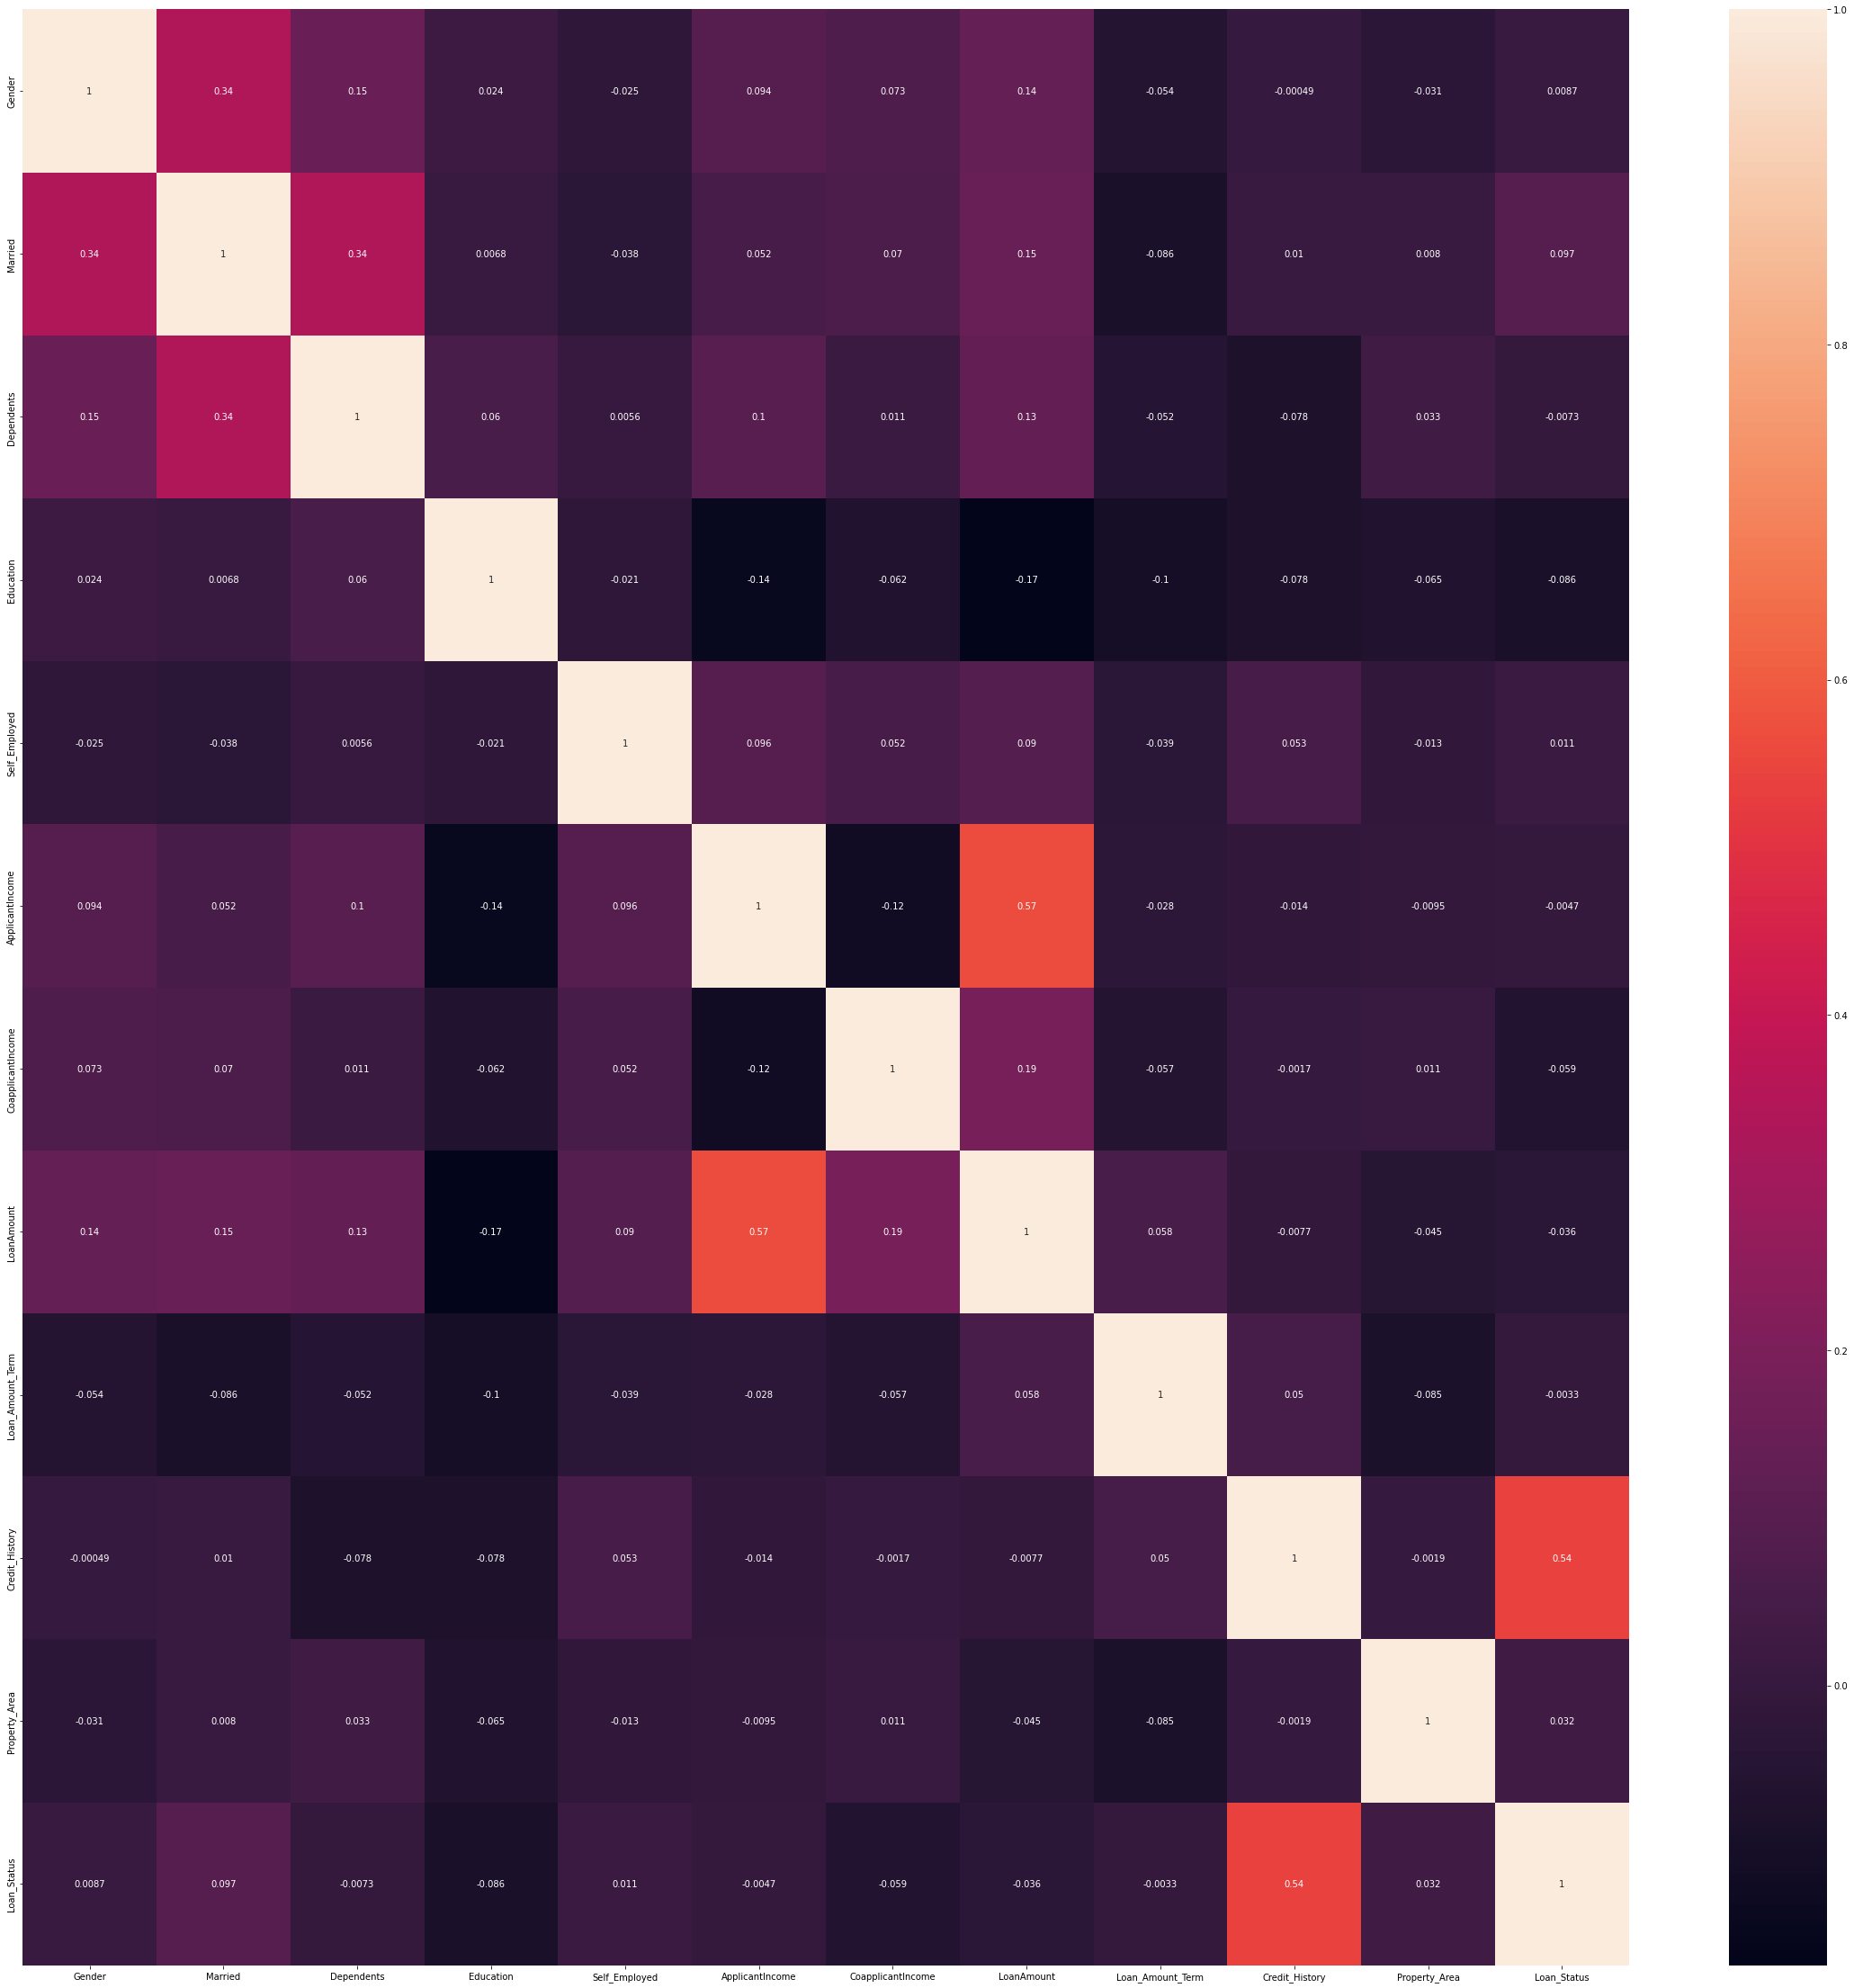

In [140]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)

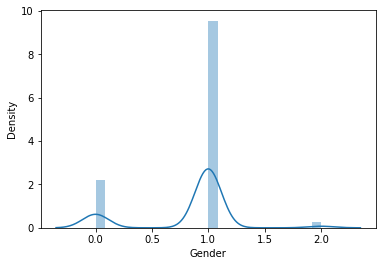

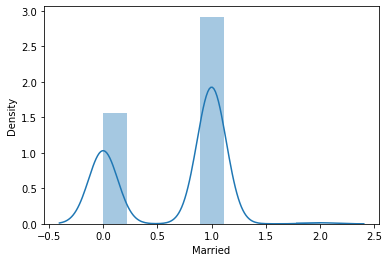

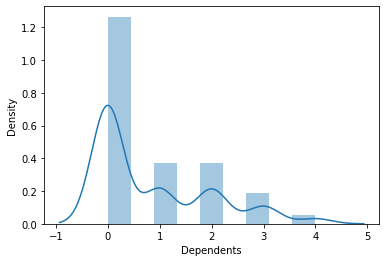

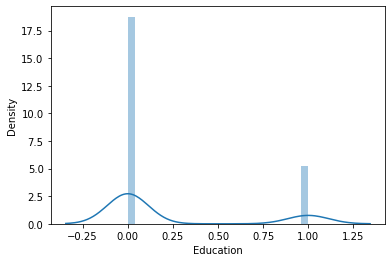

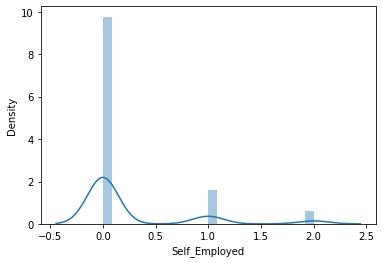

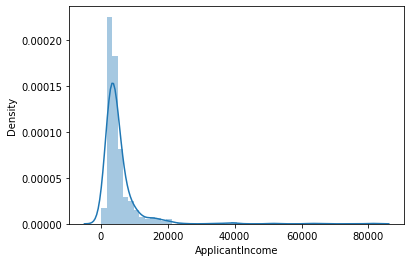

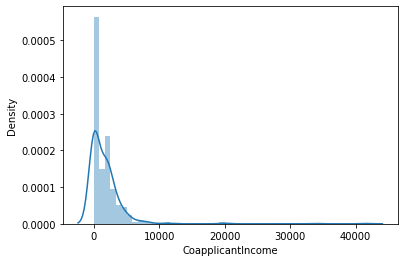

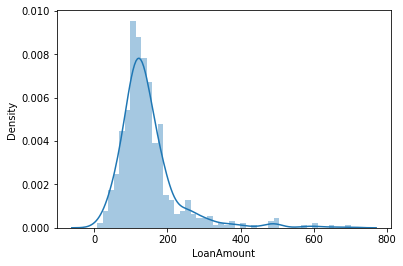

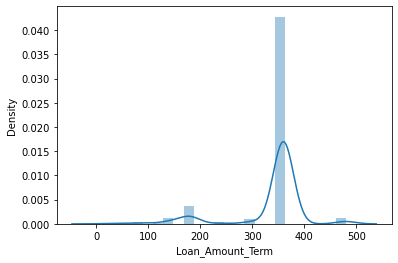

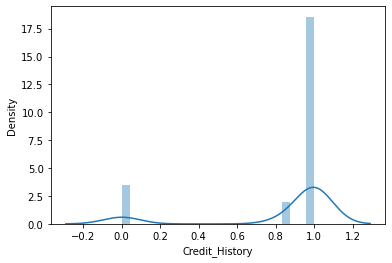

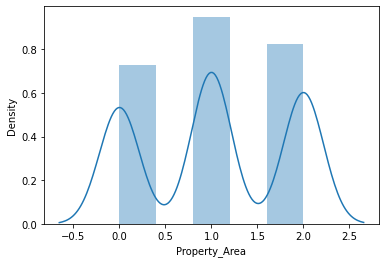

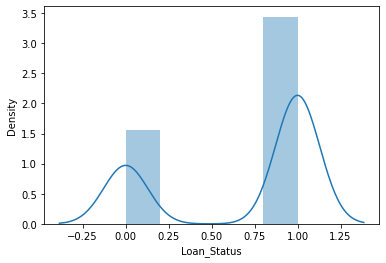

In [142]:
#from heat map clearly says there is no mlticolinearity present
import warnings
warnings.filterwarnings("ignore")
for i in df.columns:
    sns.distplot(df[i])
  
    plt.show()

In [143]:
#columns are not normally distributed we need to apply the standard scalar form
#check for snkewness
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.099411
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [144]:
from scipy import stats
df["ApplicantIncome"]=stats.yeojohnson(df["ApplicantIncome"])[0]
df["CoapplicantIncome"]=stats.yeojohnson(df["CoapplicantIncome"])[0]
df["CoapplicantIncome"]=stats.yeojohnson(df["CoapplicantIncome"])[0]
df["LoanAmount"]=stats.yeojohnson(df["LoanAmount"])[0]
df["Loan_Amount_Term"]=stats.yeojohnson(df["Loan_Amount_Term"])[0]



In [145]:
df.skew()
#skewness has removed

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome     -0.092946
CoapplicantIncome   -0.201830
LoanAmount           0.024376
Loan_Amount_Term     0.206521
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

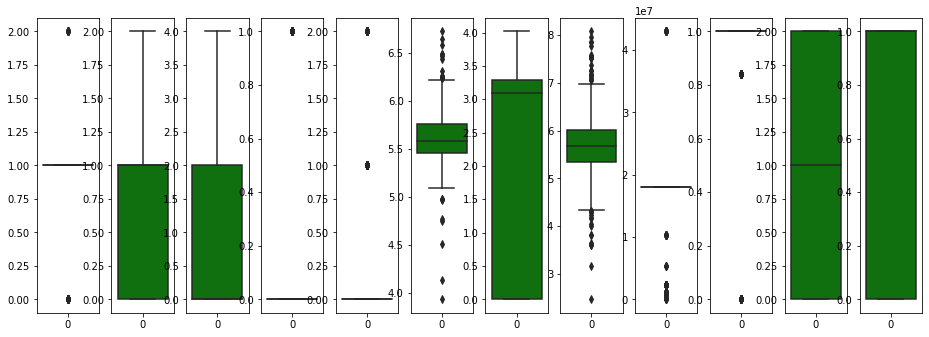

In [147]:
#check for outliers
columnlen=df.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(columnlen)):
    plt.subplot(14,30,i+1)
    sns.boxplot(data=df[columnlen[i]],orient="v",color="green")

In [148]:
from scipy import stats

In [149]:
z=np.abs(stats.zscore(df))

In [150]:
np.where(z>3)

(array([ 11,  14,  19,  24,  29,  30,  75,  94,  95, 107, 109, 111, 114,
        130, 130, 133, 155, 155, 158, 168, 170, 171, 171, 179, 185, 188,
        216, 218, 228, 231, 236, 248, 268, 293, 295, 298, 333, 333, 336,
        344, 358, 366, 369, 374, 378, 380, 385, 409, 411, 432, 443, 447,
        463, 468, 468, 500, 500, 516, 535, 542, 555, 561, 568, 573, 579,
        600, 600, 601]),
 array([4, 7, 4, 4, 4, 4, 8, 7, 4, 4, 8, 4, 4, 7, 8, 7, 5, 7, 4, 8, 4, 5,
        7, 8, 5, 5, 5, 4, 8, 4, 4, 8, 4, 8, 4, 8, 4, 5, 4, 4, 8, 8, 7, 4,
        8, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 8, 8, 4, 4, 7, 7, 7, 8, 4, 4,
        5, 4]))

In [151]:
df=df[(z<3).all(axis=1)]

In [152]:
df.shape

(553, 12)

In [153]:
#separate x and y values
x=df.drop(columns="Loan_Status")
y=df["Loan_Status"]

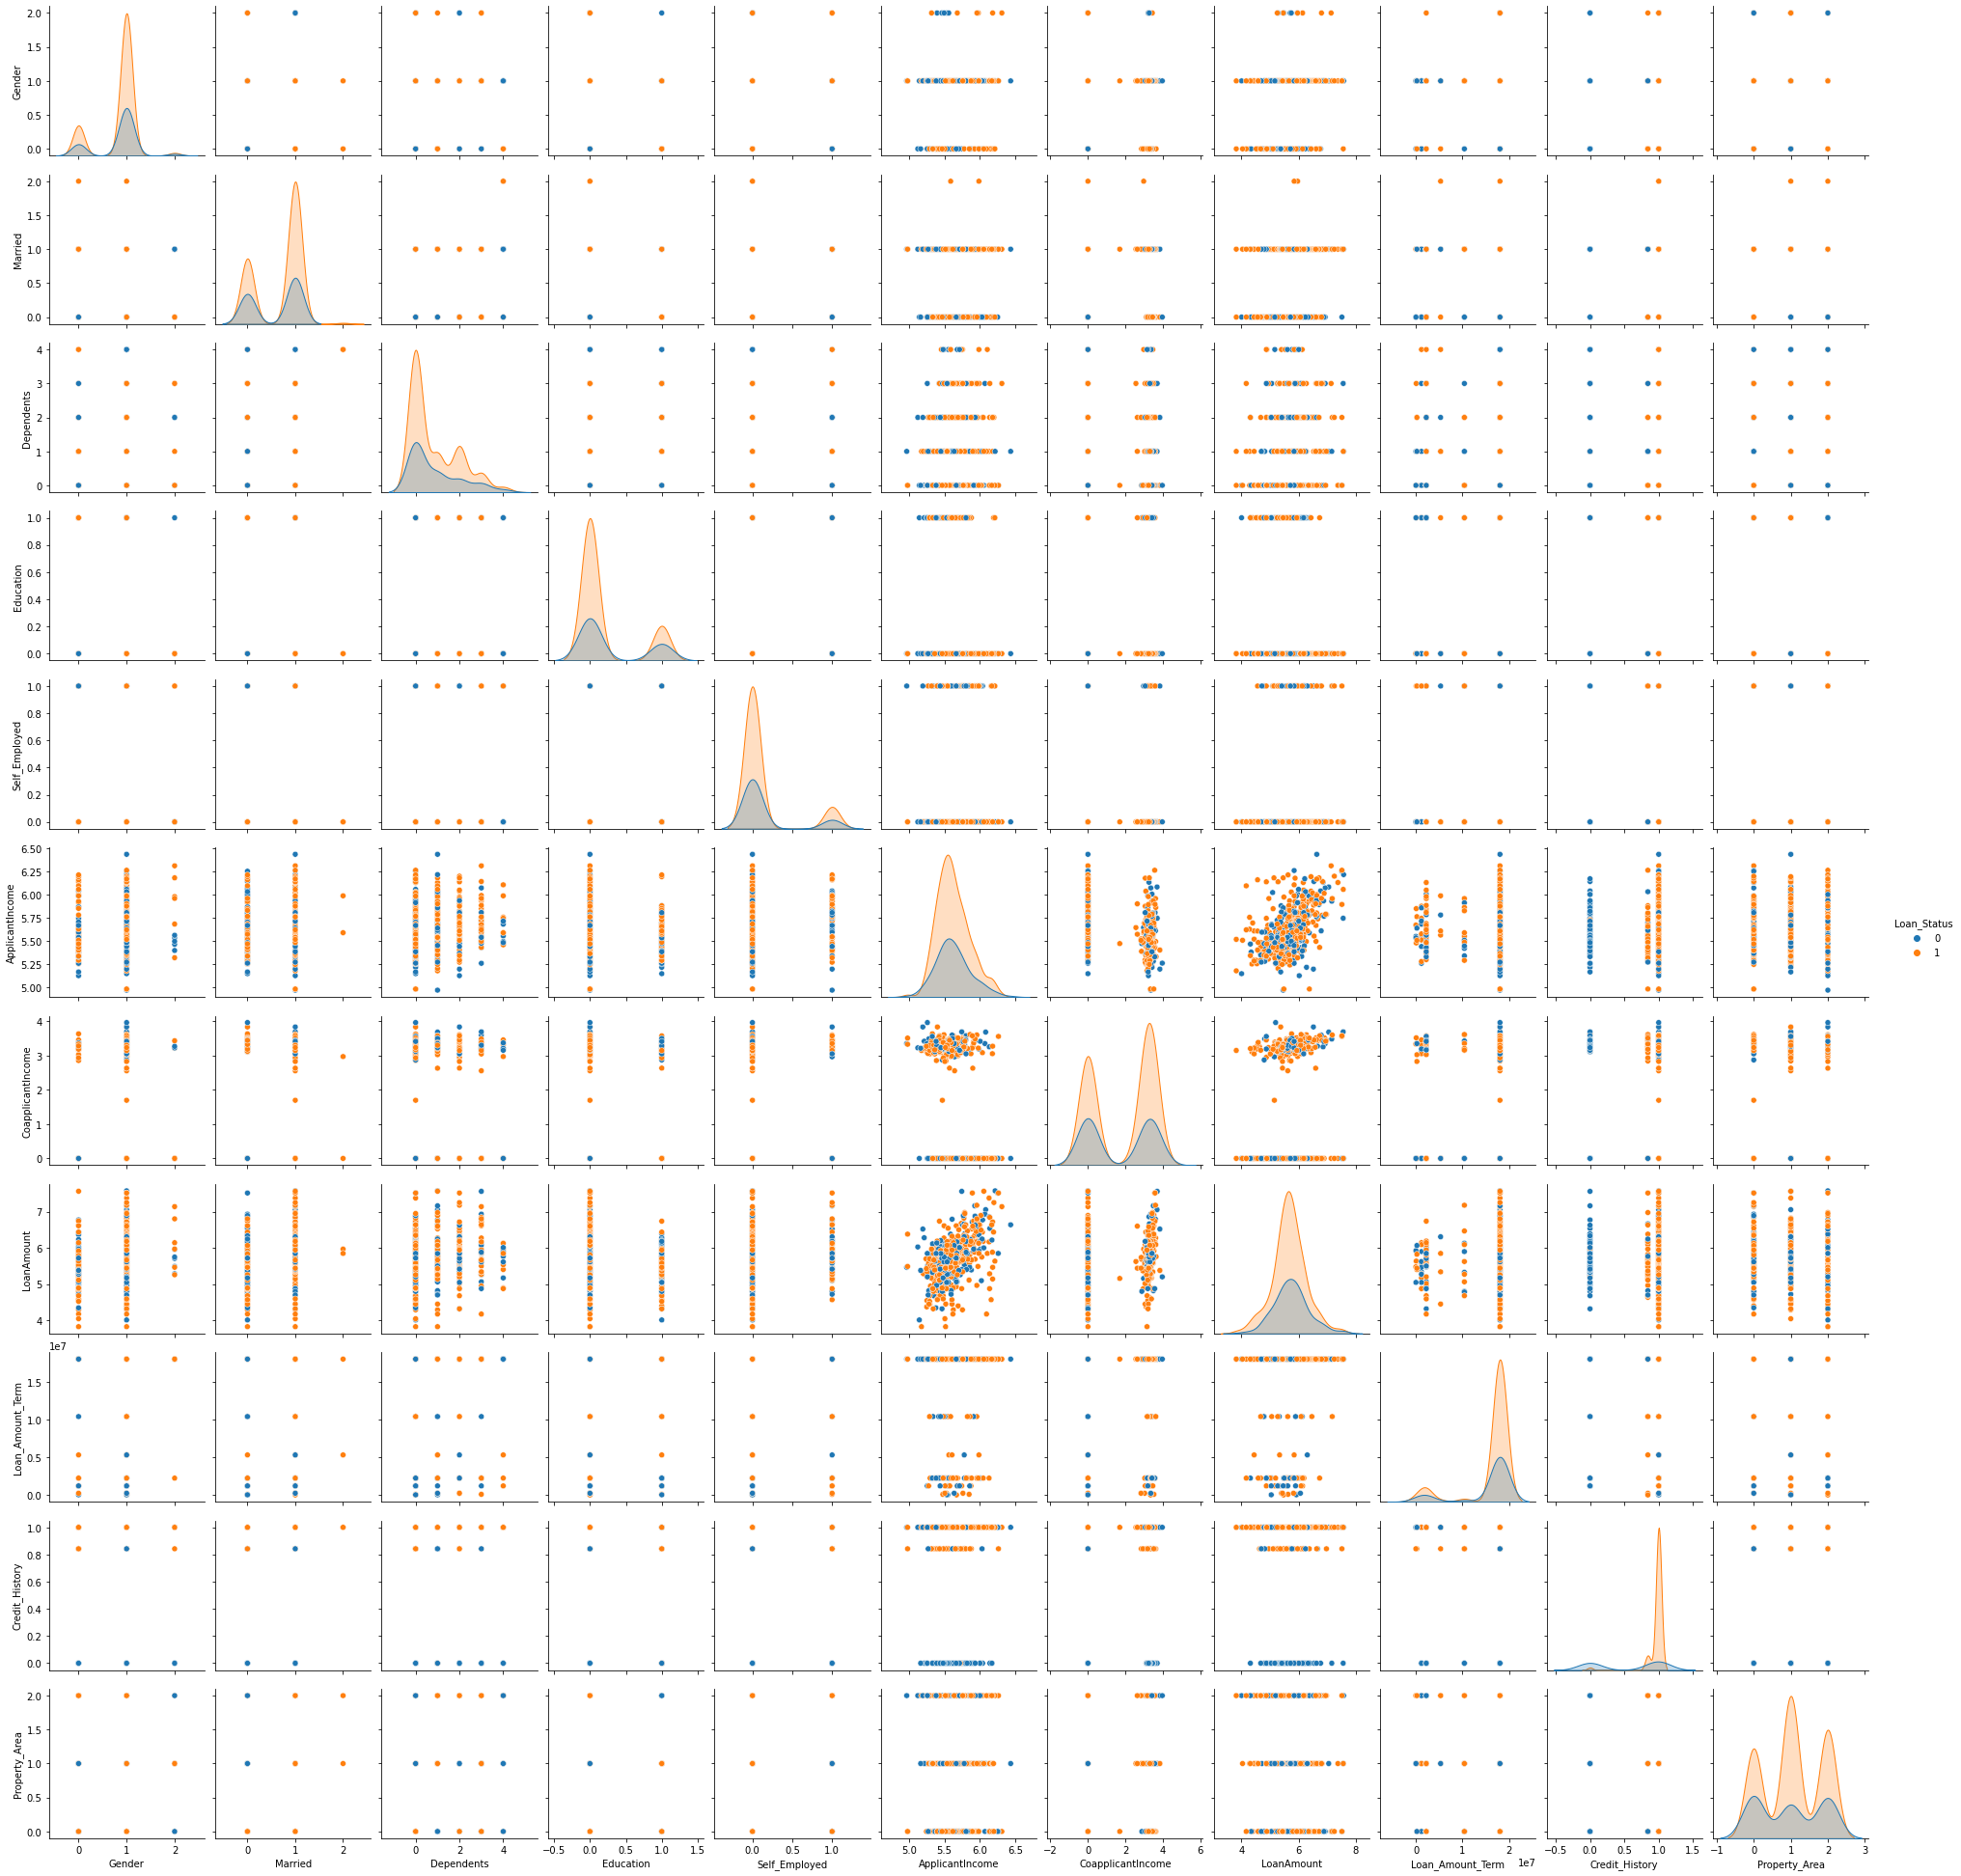

In [154]:
sns.pairplot(df,hue="Loan_Status")

In [155]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.20,)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [158]:
score=accuracy_score(y_test,y_pred)
score

0.8108108108108109

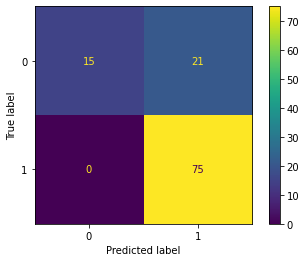

In [159]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [160]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        36
           1       0.78      1.00      0.88        75

    accuracy                           0.81       111
   macro avg       0.89      0.71      0.73       111
weighted avg       0.85      0.81      0.78       111



In [161]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
grid_parameter={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,10),
    "min_samples_split":range(3,10),
    "max_leaf_nodes":range(2,4)
}

In [162]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_parameter,cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [163]:
best_paramter=grid_search.best_params_
print(best_paramter)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [164]:
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 2, min_samples_leaf= 2, min_samples_split= 3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8108108108108109

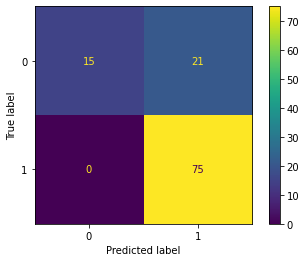

In [165]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [167]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        36
           1       0.78      1.00      0.88        75

    accuracy                           0.81       111
   macro avg       0.89      0.71      0.73       111
weighted avg       0.85      0.81      0.78       111



In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_model=SVC()
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

print(svcClf.best_params_)
print(svcClf.best_score_)

{'C': 1, 'gamma': 0.01}
0.8214141414141414


In [168]:
svc_model=SVC()
params = {'C':[1] , 'gamma': [0.01]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': [1], 'gamma': [0.01]},
             scoring='accuracy')

In [169]:
y_pred=svcClf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8108108108108109

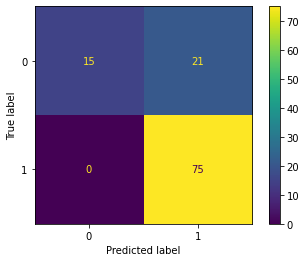

In [170]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [171]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        36
           1       0.78      1.00      0.88        75

    accuracy                           0.81       111
   macro avg       0.89      0.71      0.73       111
weighted avg       0.85      0.81      0.78       111



In [172]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
#
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf.fit(x_train, y_train)


RandomForestClassifier()

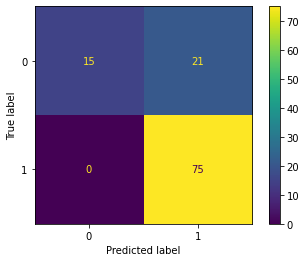

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        36
           1       0.78      1.00      0.88        75

    accuracy                           0.81       111
   macro avg       0.89      0.71      0.73       111
weighted avg       0.85      0.81      0.78       111



In [176]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [177]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.7837837837837838

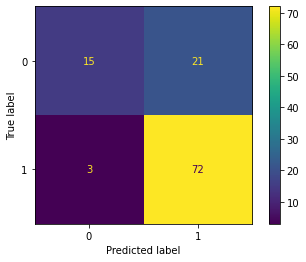

In [178]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [179]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        36
           1       0.77      0.96      0.86        75

    accuracy                           0.78       111
   macro avg       0.80      0.69      0.71       111
weighted avg       0.79      0.78      0.76       111



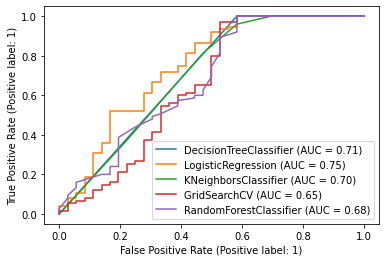

In [180]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,plot_roc_curve
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

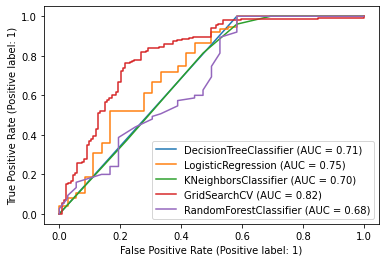

In [181]:
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

In [182]:
import pickle
filename="Survive"
pickle.dump(lr,open(filename,"wb"))